## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load

In [4]:
train_dir = '../dataset/train'
test_dir = '../dataset/test'
valid_dir = '../dataset/valid'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed=123,
    image_size=(64, 64),
    batch_size=32)

Found 35215 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.
Found 1250 files belonging to 250 classes.


### Class Names

In [5]:
class_names = train_ds.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHI

### Auto Tune

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### CNN

In [7]:
num_classes = 250

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compilar o modelo

In [6]:
opt = SGD(learning_rate=0.01, momentum=0.9)
# Experimentar loss='sparse_categorical_crossentropy'
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

## Train Model

In [8]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/3
1101/1101 [==============================] - 97s 57ms/step - loss: 5.1300 - accuracy: 0.0352 - val_loss: 3.2635 - val_accuracy: 0.2520
Epoch 2/3
1101/1101 [==============================] - 64s 58ms/step - loss: 3.2013 - accuracy: 0.2856 - val_loss: 2.4076 - val_accuracy: 0.4248
Epoch 3/3
1101/1101 [==============================] - 64s 58ms/step - loss: 2.4403 - accuracy: 0.4283 - val_loss: 2.0567 - val_accuracy: 0.5144


### Predict

In [11]:
i=2
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions[i])

Em teoria o pássaro é um JAVAN MAGPIE com 68.16 porcento de certeza.


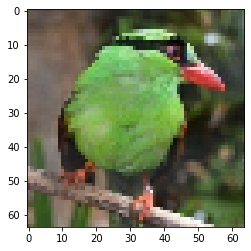

In [12]:
print(
    "Em teoria o pássaro é um {} com {:.2f} porcento de certeza."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(list(test_ds)[0][0][i]/255)
plt.show()

In [13]:
print(list(test_ds)[2][1])

tf.Tensor(
[190 180 123  23 211 131  53 172  75 232 126 200 210  28  32  41 212  41
 229  32  52  57  83 237 148 172  72 162  45 171  73  38], shape=(32,), dtype=int32)
